# Least square problem for polynomial regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

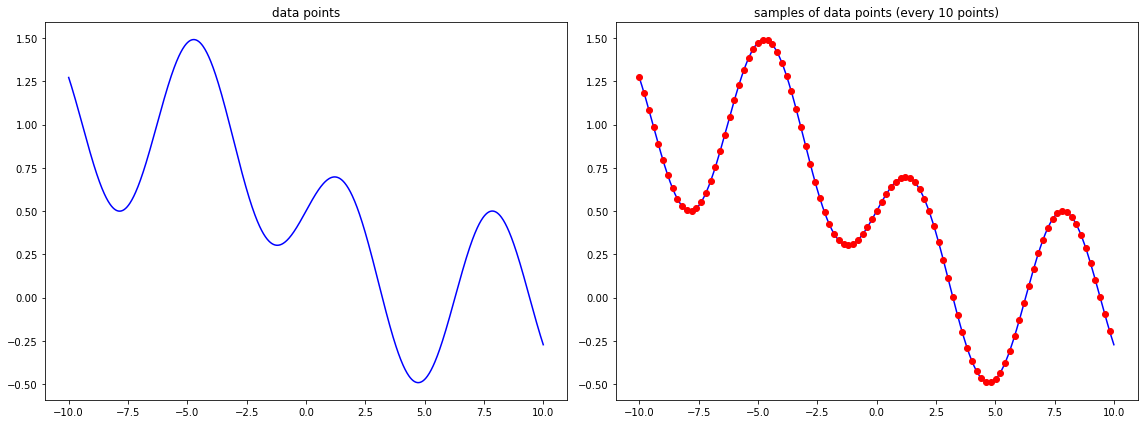

In [2]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

In [6]:
x_sample.shape

(100,)

In [12]:
x[::20].shape

(50,)

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [33]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for i in range(n):
        A[i,] = np.power(x[i],range(p))
     
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

In [31]:
A = np.zeros([3, 5])
for i in range(3):
    A[i,] = np.power(x_sample[i],range(5))
print(A)


[[ 1.00000000e+00 -1.00000000e+01  1.00000000e+02 -1.00000000e+03
   1.00000000e+04]
 [ 1.00000000e+00 -9.79980000e+00  9.60360800e+01 -9.41134377e+02
   9.22292867e+03]
 [ 1.00000000e+00 -9.59960000e+00  9.21523202e+01 -8.84625413e+02
   8.49205011e+03]]


In [23]:
np.power(x_sample[0],range(3))

array([  1., -10., 100.])

## construct vector $b$

In [34]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    b= y
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [37]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(x)
    A= construct_matrix_A(x, p)
    b= construct_vector_b(y)
    z = np.matmul(np.linalg.inv(np.matmul(A.T,A)),np.matmul(A.T,b))
    
    loss = (np.sum(np.power(np.matmul(A,z) - b , 2)))/2*n
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [59]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(x)
    A = construct_matrix_A(x, p)
    b = construct_vector_b(y)
    
    
    z = np.matmul(np.linalg.inv(np.matmul(A.T,A) + n*alpha*np.identity) ,np.matmul(A.T,b))

    loss = np.divide(np.sum(np.power(np.matmul(A,z) - b , 2)),2*n)  + (np.sum(np.power(z,2))*np.divide(alpha,2))
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

In [38]:
b = np.array([1,2,3])
np.sum(np.power(b,2))

14

In [36]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a + 3

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [58]:
np.divide(1,2)

0.5

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [40]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x, p)
    z , loss = solve_regression(x, y, p)
    y_hat = np.matmul(A,z)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [41]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x, p)
    z , loss = solve_regression_with_regularization(x, y, p, alpha)
    y_hat = np.matmul(A,z)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [42]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [43]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [44]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [45]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [46]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [47]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [48]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [49]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [50]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [51]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [52]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [53]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [54]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [55]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [56]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


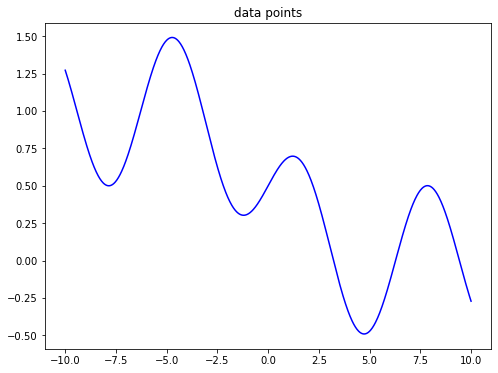

**************************************************
## [RESULT 02]
**************************************************


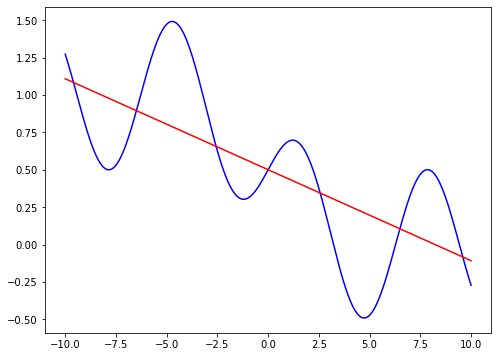

**************************************************
## [RESULT 03]
**************************************************


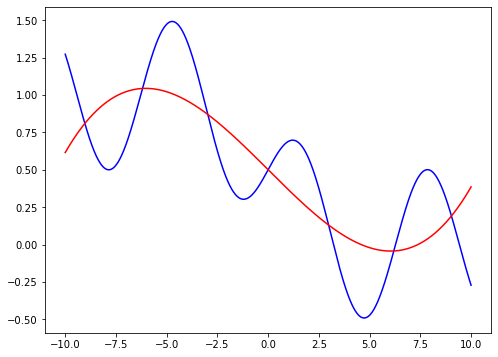

**************************************************
## [RESULT 04]
**************************************************


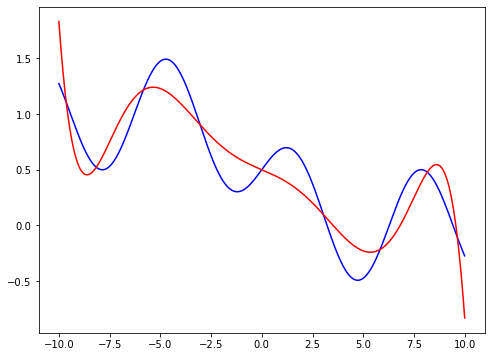

**************************************************
## [RESULT 05]
**************************************************


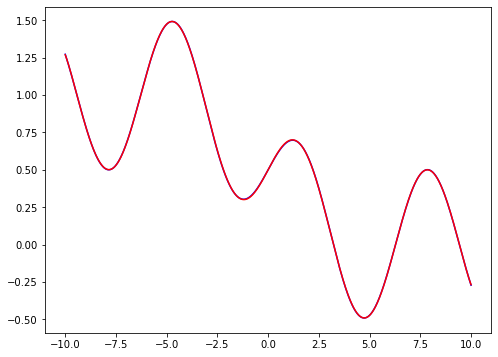

**************************************************
## [RESULT 06]
**************************************************


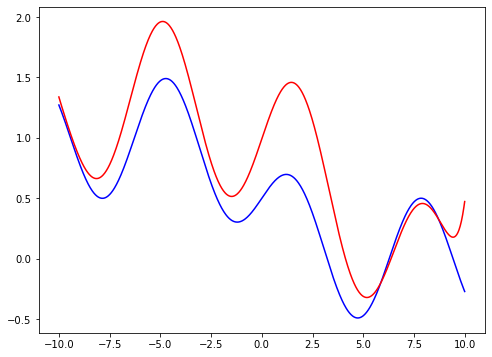

**************************************************
## [RESULT 07]
**************************************************


TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [57]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)